# <font color='red'>Used Cars Data Analysis</font>

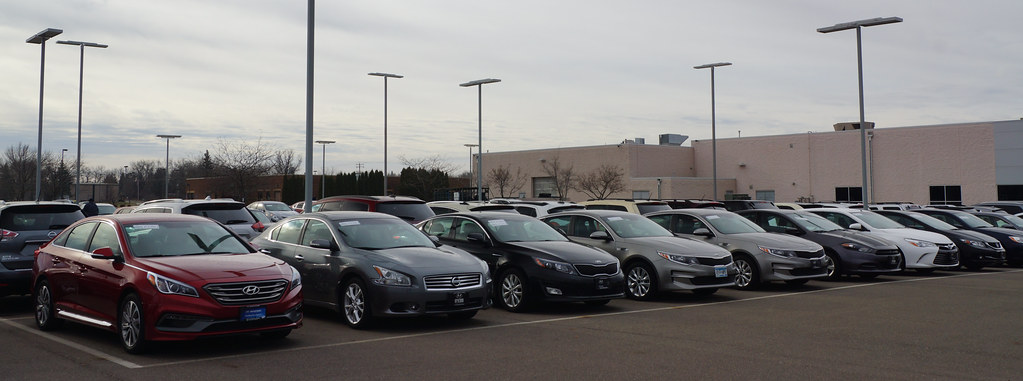

In [114]:
from IPython.display import Image
Image(filename='usedcar.jpg') 

In [1]:
#standard imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'vehicles.csv' 
try:
    data = pd.read_csv(url) #load the data into a dataframe
except IOError:
    print ('Unable to read the input file.')
    exit()

## <font color='blue'>Size of Dataset</font>

In [3]:
print("Size of data:", data.shape)
data

Size of data: (458213, 26)


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,458208,7240959076,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,14995,2014.0,cadillac,srx,excellent,...,4wd,mid-size,SUV,silver,https://images.craigslist.org/00808_1bVcaYZtCy...,2014 Cadillac SRX All Wheel Drive Luxury Colle...,wi,44.408867,-89.881210,2020-12-03T08:56:29-0600
458209,458209,7240954682,https://wausau.craigslist.org/ctd/d/wisconsin-...,wausau,https://wausau.craigslist.org,17895,2018.0,hyundai,tucson,excellent,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00l0l_gikkP11dEF...,2018 Hyundai Tucson SE 2.0 I4 AWD. Carfax ver...,wi,44.408867,-89.882240,2020-12-03T08:48:08-0600
458210,458210,7240645700,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,17900,2014.0,cadillac,cts coupe awd,excellent,...,4wd,mid-size,coupe,black,https://images.craigslist.org/00t0t_lNnW4cboOG...,"53,000 miles. Cosmetically, in near mint condi...",wy,44.784900,-106.964800,2020-12-02T14:09:45-0700
458211,458211,7240600465,https://wyoming.craigslist.org/cto/d/sheridan-...,wyoming,https://wyoming.craigslist.org,1300,2008.0,jeep,grand cherokee,good,...,4wd,mid-size,SUV,white,https://images.craigslist.org/00C0C_fl0NW1IeJw...,PRICE REDUCTION Turns out the engine is toast...,wy,44.773500,-106.939600,2020-12-02T13:01:04-0700


## <font color='blue'>Data Cleaning</font>

###  Concise summary of a Data.

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
Unnamed: 0      458213 non-null int64
id              458213 non-null int64
url             458213 non-null object
region          458213 non-null object
region_url      458213 non-null object
price           458213 non-null int64
year            457163 non-null float64
manufacturer    439993 non-null object
model           453367 non-null object
condition       265273 non-null object
cylinders       287073 non-null object
fuel            454976 non-null object
odometer        402910 non-null float64
title_status    455636 non-null object
transmission    455771 non-null object
VIN             270664 non-null object
drive           324025 non-null object
size            136865 non-null object
type            345475 non-null object
paint_color     317370 non-null object
image_url       458185 non-null object
description     458143 non-null object
state           458213 non-null 

In [126]:
data.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


###  Handling null values

In [127]:
Cars = data[['state','fuel','year','manufacturer','model','odometer','transmission','price']]
Cars

,state,fuel,year,manufacturer,model,odometer,transmission,price
0,al,gas,2010.0,chevrolet,corvette grand sport,32742.0,other,35990
1,al,gas,2014.0,hyundai,sonata,93600.0,automatic,7500
2,al,gas,2006.0,bmw,x3 3.0i,87046.0,automatic,4900
3,al,gas,1974.0,chevrolet,c-10,190000.0,automatic,2000
4,al,diesel,2005.0,ford,f350 lariat,116000.0,automatic,19500
...,...,...,...,...,...,...,...,...
458208,wi,gas,2014.0,cadillac,srx,83790.0,automatic,14995
458209,wi,gas,2018.0,hyundai,tucson,31888.0,automatic,17895
458210,wy,gas,2014.0,cadillac,cts coupe awd,53000.0,automatic,17900
458211,wy,gas,2008.0,jeep,grand cherokee,164000.0,automatic,1300


In [128]:
#Dropping null values of price column
Cars.drop(Cars[Cars['price'] == 0].index, inplace = True) 
#Dropping null values of year column
Cars.drop(Cars[Cars['year'].isna()].index, inplace = True) 
#Dropping null values of manufacturer column
Cars.drop(Cars[Cars['manufacturer'].isna()].index, inplace = True) 
#Dropping null values of model column
Cars.drop(Cars[Cars['model'].isna()].index, inplace = True) 
#Dropping null values of fuel column
Cars.drop(Cars[Cars['fuel'].isna()].index, inplace = True) 
#Dropping null values of odometer column
Cars.drop(Cars[Cars['odometer']<=0].index, inplace = True)
Cars.drop(Cars[Cars['odometer'].isna()].index, inplace = True)
#Dropping null values of transmission column
Cars.drop(Cars[Cars['transmission'].isna()].index, inplace = True) 
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355490 entries, 0 to 458211
Data columns (total 8 columns):
state           355490 non-null object
fuel            355490 non-null object
year            355490 non-null float64
manufacturer    355490 non-null object
model           355490 non-null object
odometer        355490 non-null float64
transmission    355490 non-null object
price           355490 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 24.4+ MB


 ## <font color='blue'>Visualizing data</font>

 ### What automobile manufacturer is found on Craiglist the most?

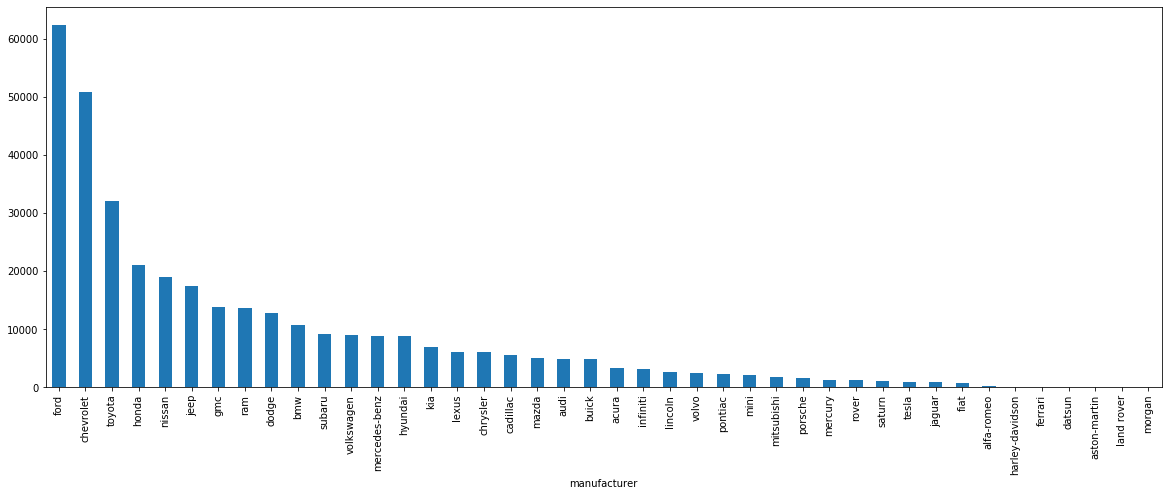

In [129]:
a=Cars
a=a.groupby(['manufacturer'])['model'].agg('count')
a=a.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,7))
a.plot(kind='bar',ax=ax)

 ### Visualizing average price of given car for different years

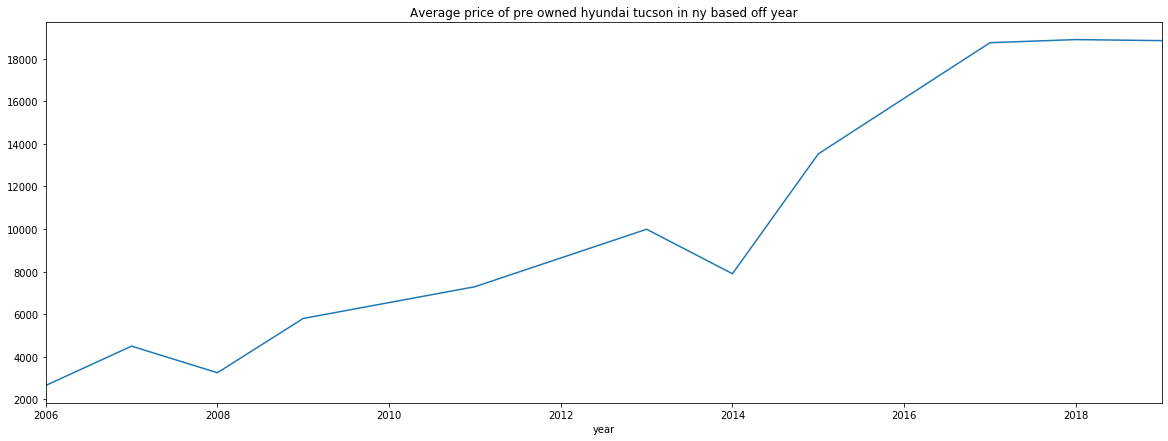

In [130]:
def pry(C,w,m,s):
    try:
        b=C.loc[(C['manufacturer']==w) & (C['model']==m) & (C['state']==s)]   
        b=b.groupby(['year'])['price'].agg('mean')
        fig, ax = plt.subplots(figsize=(20,7))
        b.plot(kind='line',ax=ax)
        plt.title('Average price of pre owned '+ w+' ' +m+' in ' +s+' based off year')
    except Exception as error:
        print('Caught this error: ' + repr(error))
pry(Cars,'hyundai','tucson','ny')

 ### Visualizing average price of given car in different states

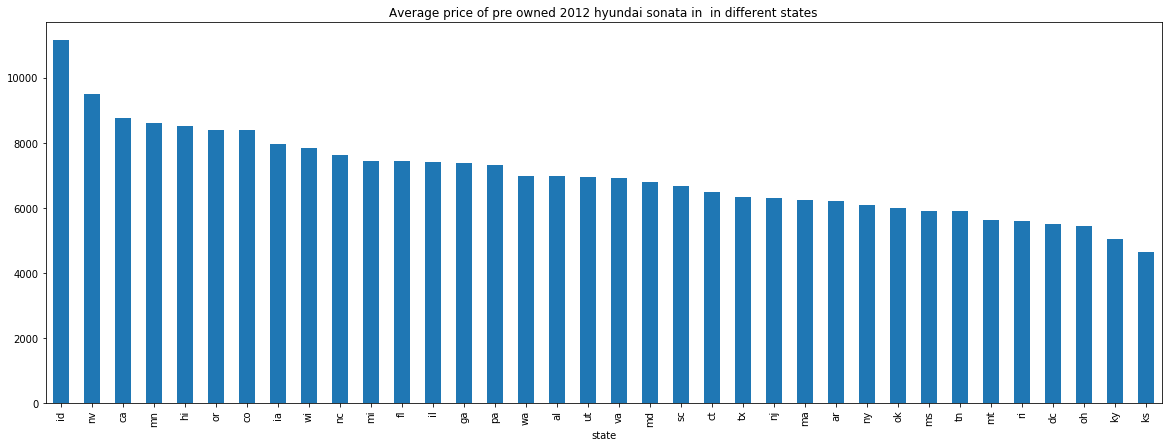

In [131]:
def prs(C,w,m,s):
    try:
        b=C.loc[(C['manufacturer']==w) & (C['model']==m) & (C['year']==s)]   
        b=b.groupby(['state'])['price'].agg('mean')
        b=b.sort_values(ascending=False)
        fig, ax = plt.subplots(figsize=(20,7))
        b.plot(kind='bar',ax=ax)
        plt.title('Average price of pre owned '+str(s)+' ' + w+' ' +m+' in ' +' in different states')
    except Exception as error:
        print('Caught this error: ' + repr(error))
prs(Cars,'hyundai','sonata',2012)

 ## <font color='blue'>Data Preperation for the model</font>

#### Limiting Dataset to 10K rows since our laptops were taking so long to handle larger scale of dataset:

In [132]:
Car1=Cars.sample(n = 10000,random_state=4)
price=Car1['price']
Car2=Car1.iloc[:,:-1]
Car1

,state,fuel,year,manufacturer,model,odometer,transmission,price
437793,az,gas,2015.0,mercedes-benz,c300 4matic c 300,40000.0,automatic,20500
390385,tx,gas,2003.0,jeep,grand cherokee,59000.0,automatic,6000
73004,co,gas,2018.0,bmw,x5 m,13000.0,automatic,75000
393829,ut,gas,2018.0,subaru,wrk - awd turbo,35004.0,manual,21950
75454,co,diesel,2014.0,chevrolet,silverado 2500hd,135000.0,automatic,31500
...,...,...,...,...,...,...,...,...
251674,nv,gas,2007.0,hyundai,elantra,32928.0,automatic,8434
257438,nj,gas,2004.0,gmc,sierra 1500,109645.0,automatic,10000
157163,ia,gas,2013.0,nissan,sentra sv,85000.0,automatic,7200
443532,ca,gas,2015.0,rover,range evoque pure,33449.0,automatic,27990


#### Splitting Dataset:

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Car2,price, test_size=0.2, random_state=42)

In [134]:
y_train

377884    32900
337437     8995
249220     6677
203413    30990
54468     12990
          ...  
310518    22899
341988    24990
204492    21450
419652    23870
251997     8999
Name: price, Length: 8000, dtype: int64

#### Imputing missing values with the median and scaling the data:

###### 1. First separate continuous and categorical data

In [135]:
import numpy as np
Categorical=X_train.loc[:,X_train.dtypes==np.object]
Continuous=X_train.loc[:,X_train.dtypes!=np.object]

##### 2. Transformer to fill continuous data missing values and scaling the data using Standard Scaler

In [136]:
continuous_features  = list(Continuous.columns)
#Tranformer
continous_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])

##### 3. Transformer to fill categorical data missing values and encode variables using hot encoder

In [137]:
categorical_features = list(Categorical.columns)
#Tranformer
categorical_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NotApp')), #Use an alternative value to indicate NA in the dataset
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

##### 4.Column Transformer

In [138]:
data_preprocessor   = ColumnTransformer(
    transformers = [
        ('continious', continous_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

###### 5. Preparing the data based on the information provided by above cells 

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [140]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

data_prep_pipeline  = Pipeline(steps=[('preprocessor', data_preprocessor), #This performs the data preparation steps in the cell above
                                      ('feature_selection', SelectFromModel(LinearSVC(penalty="l2")))
                    ])

###### 6. Finally transformed and fit the data

In [141]:
transformed_data    = data_prep_pipeline.fit_transform(X_train, y_train)

C:\Users\alikh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 ## <font color='blue'>Building the model</font>

In [142]:
X = pd.DataFrame(transformed_data.toarray()) #this is the transformed data from the pipeline
y = y_train #this is the output

#Build a sequential model with at least three dense layers (you can add more layers as needed)
#Note: you can also add this keras model to the data preprocessing pipeline but we can skip that step for now.
ffnn_model = Sequential()
## Add hidden layers, one line at time, below
ffnn_model.add(Dense(1024,activation='relu'))
ffnn_model.add(Dense(512,activation='relu'))
ffnn_model.add(Dense(128,activation='relu'))
ffnn_model.add(Dense(64,activation='relu'))
ffnn_model.add(Dense(32,activation='relu'))
ffnn_model.add(Dense(16,activation='relu'))
ffnn_model.add(Dense(8,activation='relu'))
ffnn_model.add(Dense(4,activation='relu'))
ffnn_model.add(Dense(2,activation='relu'))
#Here is the oddput layer
ffnn_model.add(Dense(1, activation='linear'))



#There are options you may want to change and try to improve performance.
ffnn_model.compile(optimizer= 'adam', 
                   loss= 'mean_absolute_error', 
                   metrics= 'mae'  
                  )

ffnn_history = ffnn_model.fit(X, y, 
                              validation_split= 0.2, 
                              epochs= 200, 
                              batch_size= 1000,
                              verbose=1)

Epoch 1/200
7/7 [==============================] - 2s 112ms/step - loss: 16438.5016 - mae: 16438.5016 - val_loss: 16688.8633 - val_mae: 16688.8633
Epoch 2/200
7/7 [==============================] - 0s 60ms/step - loss: 16673.5950 - mae: 16673.5955 - val_loss: 16686.7207 - val_mae: 16686.7207
Epoch 3/200
7/7 [==============================] - 0s 66ms/step - loss: 16525.8708 - mae: 16525.8708 - val_loss: 16676.5703 - val_mae: 16676.5703
Epoch 4/200
7/7 [==============================] - 0s 63ms/step - loss: 16657.1331 - mae: 16657.1331 - val_loss: 16635.9590 - val_mae: 16635.9590
Epoch 5/200
7/7 [==============================] - 0s 66ms/step - loss: 16516.8842 - mae: 16516.8842 - val_loss: 16494.1953 - val_mae: 16494.1953
Epoch 6/200
7/7 [==============================] - 0s 67ms/step - loss: 16333.6056 - mae: 16333.6056 - val_loss: 16053.9492 - val_mae: 16053.9492
Epoch 7/200
7/7 [==============================] - 0s 67ms/step - loss: 15888.6331 - mae: 15888.6331 - val_loss: 14804.9424

7/7 [==============================] - 0s 63ms/step - loss: 3809.3340 - mae: 3809.3340 - val_loss: 4150.6982 - val_mae: 4150.6982
Epoch 116/200
7/7 [==============================] - 0s 69ms/step - loss: 3817.3988 - mae: 3817.3988 - val_loss: 4142.0029 - val_mae: 4142.0029
Epoch 117/200
7/7 [==============================] - 0s 68ms/step - loss: 3685.0254 - mae: 3685.0254 - val_loss: 4148.1943 - val_mae: 4148.1943
Epoch 118/200
7/7 [==============================] - 0s 57ms/step - loss: 3615.6906 - mae: 3615.6906 - val_loss: 4150.7129 - val_mae: 4150.7129
Epoch 119/200
7/7 [==============================] - 0s 61ms/step - loss: 3604.4218 - mae: 3604.4218 - val_loss: 4152.0181 - val_mae: 4152.0181
Epoch 120/200
7/7 [==============================] - 0s 54ms/step - loss: 3641.5464 - mae: 3641.5465 - val_loss: 4162.9980 - val_mae: 4162.9980
Epoch 121/200
7/7 [==============================] - 0s 61ms/step - loss: 3655.4201 - mae: 3655.4201 - val_loss: 4149.1777 - val_mae: 4149.1777
Epoch 

Epoch 172/200
7/7 [==============================] - 0s 68ms/step - loss: 3228.9835 - mae: 3228.9835 - val_loss: 4195.6367 - val_mae: 4195.6367
Epoch 173/200
7/7 [==============================] - 0s 65ms/step - loss: 3267.7829 - mae: 3267.7829 - val_loss: 4187.1309 - val_mae: 4187.1309
Epoch 174/200
7/7 [==============================] - 0s 73ms/step - loss: 3252.1900 - mae: 3252.1900 - val_loss: 4195.8198 - val_mae: 4195.8198
Epoch 175/200
7/7 [==============================] - 0s 68ms/step - loss: 3364.0683 - mae: 3364.0683 - val_loss: 4191.9131 - val_mae: 4191.9131
Epoch 176/200
7/7 [==============================] - 0s 69ms/step - loss: 3257.0708 - mae: 3257.0708 - val_loss: 4192.7573 - val_mae: 4192.7573
Epoch 177/200
7/7 [==============================] - 0s 64ms/step - loss: 3190.1043 - mae: 3190.1043 - val_loss: 4189.2114 - val_mae: 4189.2114
Epoch 178/200
7/7 [==============================] - 0s 65ms/step - loss: 3208.3658 - mae: 3208.3658 - val_loss: 4208.6157 - val_mae: 42

#### Visualizing the training and validation loss

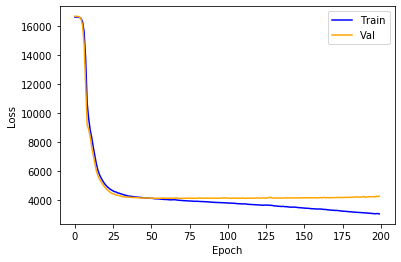

In [143]:
plt.plot(ffnn_history.history['loss'], 'b', ffnn_history.history['val_loss'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### Testing the model

In [111]:
test_data    = data_prep_pipeline.transform(X_test) #transform the data

In [112]:
X = pd.DataFrame(test_data.toarray())
Sample=ffnn_model.predict(X)
Sample

array([[ 8677.91 ],
       [15763.556],
       [13403.544],
       ...,
       [46730.54 ],
       [11606.13 ],
       [ 4499.706]], dtype=float32)

 ## <font color='blue'>Future Work</font>

 #### 1. Work with much larger dataset such as 50k-100k rows for achieving high performance. Unfortunately, our computers were not that powerful to handle large set of Dataset by using SVM

 #### 2. Increase the number of hidden layers

 #### 3. Consider more features of cars for predicting price